In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots

2026-01-27 14:49:40.191 | INFO     | iraklis7_linrg.config:<module>:15 - PROJ_ROOT path is: /Users/iraklis/git/iraklis7_linrg


### Load the data

In [3]:
norm_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
plot_path: Path = config.FIGURES_DIR / config.FEATURES_PLOT
heatmap_path: Path = config.FIGURES_DIR / config.HEATMAP_PLOT

data_tr = config.read_data(norm_path)
if data_tr is None:
    raise ValueError("read_data failed - data is None")
features = config.read_data(features_path)
if features is None:
    raise ValueError("read_data failed - data is None")
labels = config.read_data(labels_path)
if labels is None:
    raise ValueError("read_data failed - data is None")

features.sample(10)

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Όροφος Ρετιρέ,Ηλικία,Κατάσταση,Ασανσέρ από 3ο
33,-1.242745,0.280010,-0.371787,NaN,0.377964,NaN,0.474154,NaN,-0.317675,0.742918,-0.827653,0.788430
94,0.207697,-0.962775,-1.321908,0.500932,0.377964,-2.139848,-1.161617,0.666071,-0.317675,-0.628623,1.263260,-1.268344
19,0.831232,-0.732629,-0.371787,NaN,0.377964,-2.139848,0.520890,NaN,-0.317675,0.742918,-0.827653,0.788430
32,0.174243,-0.962775,0.103274,NaN,0.377964,0.467323,-1.208353,NaN,-0.317675,-0.628623,-0.827653,0.788430
97,-2.879075,-0.042193,1.053395,NaN,0.377964,0.467323,1.922979,NaN,-0.317675,2.114458,1.263260,0.788430
64,-0.407247,-0.410426,-0.846847,-1.183235,0.377964,0.467323,1.315407,NaN,-0.317675,0.742918,0.217803,-1.268344
46,-1.950292,2.995725,NaN,NaN,-2.645751,0.467323,1.315407,NaN,-0.317675,0.742918,0.217803,-1.268344
81,-1.238452,-0.502484,0.578335,-0.060457,0.377964,0.467323,-0.881199,0.666071,3.147871,-0.628623,1.263260,0.788430
110,0.469946,-0.962775,-0.846847,0.500932,0.377964,0.467323,-0.367100,-2.520529,-0.317675,-0.628623,-0.827653,-1.268344
102,0.353245,-0.778658,0.103274,-0.060457,0.377964,NaN,-0.226891,NaN,-0.317675,-0.628623,-0.827653,0.788430


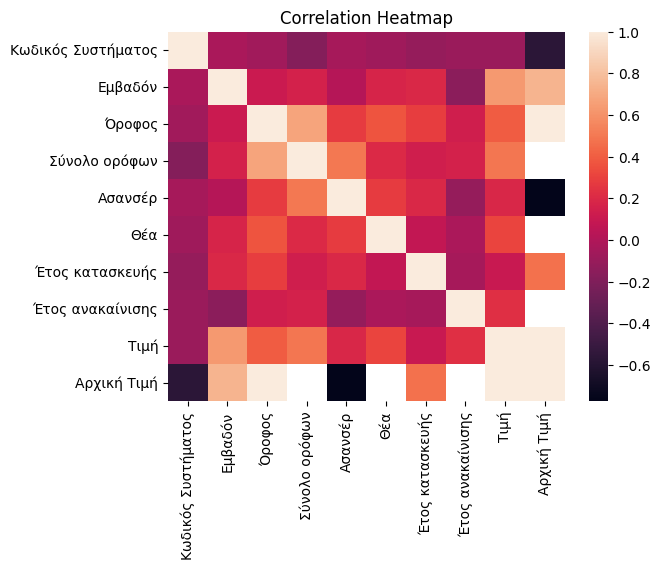

<Figure size 640x480 with 0 Axes>

In [4]:
plots.do_heatmap(data_tr, show=True, output_path=heatmap_path)


### Visualize features and labels

In [5]:
features.head()

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Όροφος Ρετιρέ,Ηλικία,Κατάσταση,Ασανσέρ από 3ο
0,-0.173384,0.418097,-1.321908,-0.621846,0.377964,0.467323,0.240472,0.392934,-0.317675,0.742918,1.263260,-1.268344
1,-0.421445,-0.778658,-0.846847,NaN,0.377964,0.467323,-0.226891,NaN,-0.317675,-0.628623,-0.827653,-1.268344
2,0.229271,0.510156,1.528456,1.062320,0.377964,0.467323,-0.320363,-1.610072,3.147871,-0.628623,-0.827653,0.788430
3,0.531686,-0.180281,1.053395,NaN,0.377964,0.467323,1.922979,NaN,-0.317675,2.114458,1.263260,0.788430
4,0.272565,-0.732629,0.578335,1.062320,0.377964,0.467323,-0.507309,NaN,-0.317675,-0.628623,-0.827653,0.788430


In [6]:
labels.head()

,Τιμή
0,245.0
1,171.0
2,400.0
3,370.0
4,229.0


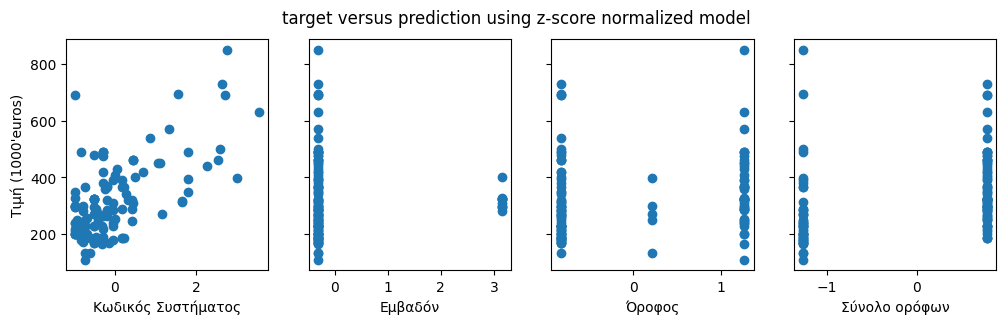

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.418097,-0.317675,1.263260,-1.268344
1,-0.778658,-0.317675,-0.827653,-1.268344
2,0.510156,3.147871,-0.827653,0.788430
3,-0.180281,-0.317675,1.263260,0.788430
4,-0.732629,-0.317675,-0.827653,0.788430


<Figure size 640x480 with 0 Axes>

In [8]:
features_sel = features[['Εμβαδόν', 'Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']]
plots.gen(list(features), features_sel.to_numpy(), labels, None, None, None, show=True, output_path=plot_path)

features_sel.head()